 # Téléchargement de la structure de bandes électroniques du matériau

In [7]:
from pymatgen.ext.matproj import MPRester

with MPRester("Igrq5N9t2TZdFvec") as m:

    bandstructure = m.get_bandstructure_by_material_id("mp-961706")

# Analyse de la structure de bandes électroniques du matériau

#########################################################################################################################

Bande interdite :

#########################################################################################################################

Elle est indirecte.
Son énergie est de 0.9013 eV.
Le vecteur de transition est \Gamma-X .

en jaune : bande interdite
en vert : maxima de la bande de valence
en rouge : minima de la bande conduction


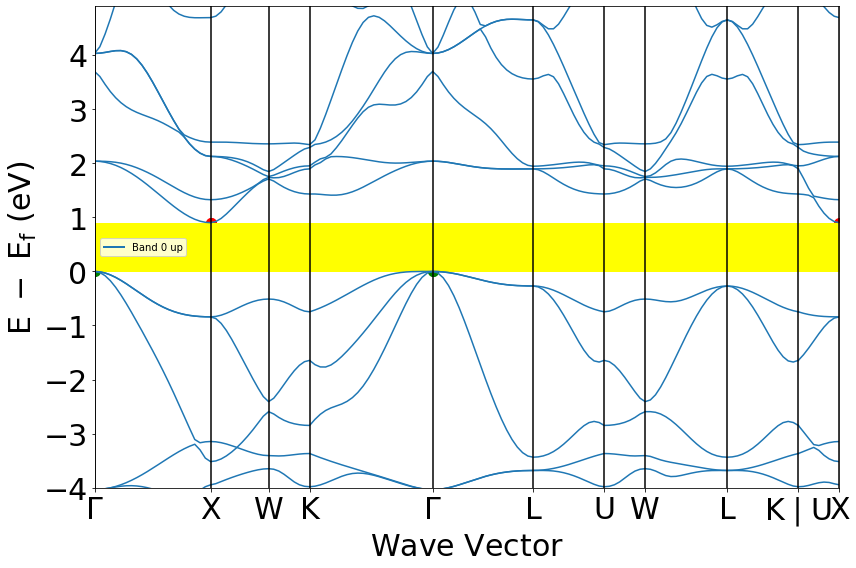

#########################################################################################################################

Directions dans lesquelles la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion :

#########################################################################################################################

Bandes de valence contenant les énergies les plus hautes :  [9, 10, 11]
Bande de conduction contenant l'énergie la plus basse :  [12] 

La dispersion maximale de la bande de valence entre Γ-X : -0.788989675497137
Elle est représentée par la flèche bleue sur la figure ci-dessous.

La dispersion minimale de la bande de valence entre U-X : -0.2472473418026495
Elle est représentée par la flèche rouge sur la figure ci-dessous.

La dispersion maximale de la bande de conduction entre X-W : 1.5186384638213373
Elle est représentée par la flèche verte sur la figure ci-dessous.

La dispersion minimale de la bande de co

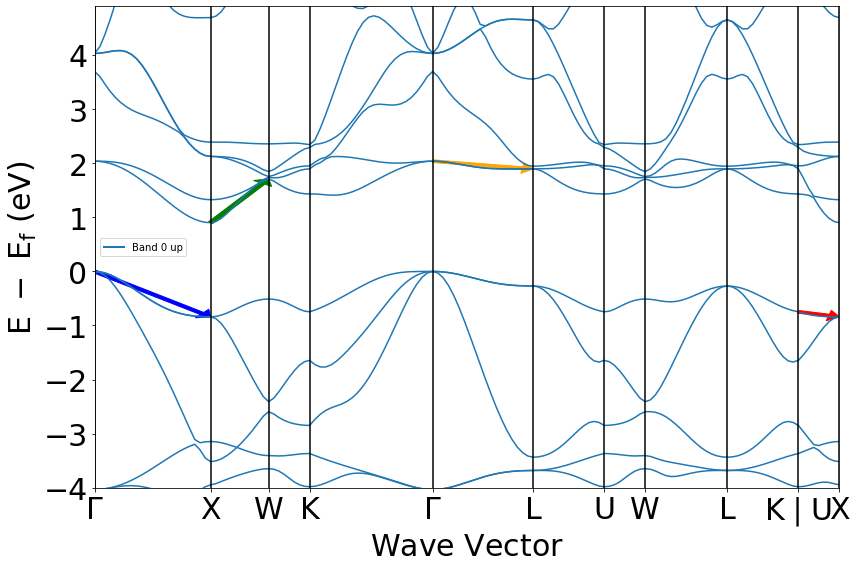

#########################################################################################################################

Masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique :

#########################################################################################################################

La masse effective est donnée par la constante de Planck au carré sur la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.
En supposant une dispersion parabolique, l'énergie de la bande électronique peut être approximée par une équation du second degré: E(k) = ak^2 + bk + c. Cette approximation est représentée sur le graphe ci-dessous.
Les constantes a, b et c sont déterminées en faisant une interpolation polynomiale à partir de 3 points.
L'équation pour déterminer la masse effective devient alors la constante de Planck au carré sur 2a.



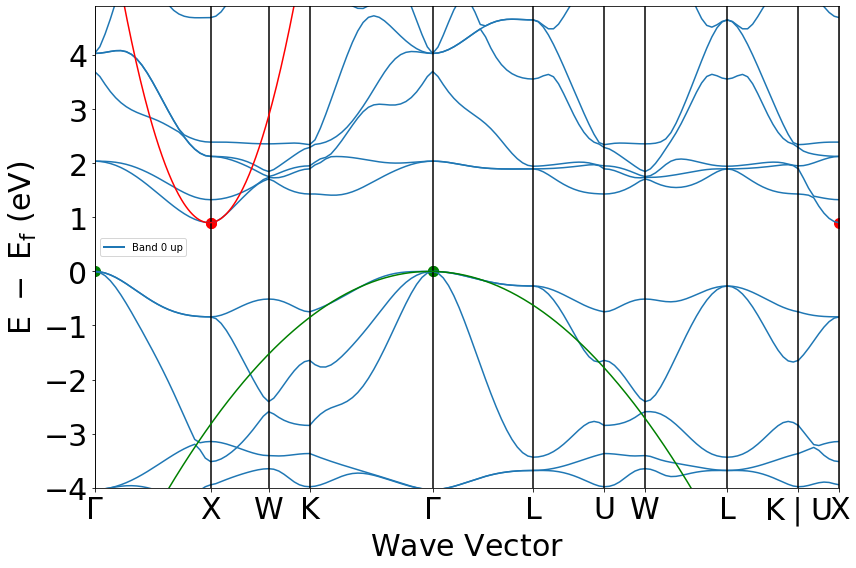

Masse effective au sommet de la dernière bande de valence :  -4.9762849815427794e-30 kg
Masse effective à la base de la première bande de conduction :  5.247603576668184e-31 kg


In [10]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt



# 1. Bande interdite

print("#########################################################################################################################\n")
print("Bande interdite :\n")
print("#########################################################################################################################\n")

bandgap = bandstructure.get_band_gap()

if bandgap.get("direct") == False:
    print("Elle est indirecte.")
else:
    print("Elle est directe.")
    
print("Son énergie est de", bandgap.get("energy"), "eV.")

print("Le vecteur de transition est", bandgap.get("transition"), ".\n")

print("en jaune : bande interdite\nen vert : maxima de la bande de valence\nen rouge : minima de la bande conduction")

bsplotter = BSPlotter(bandstructure)
bsplotter.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.fill_between(np.linspace(0, bsplotter.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, bandgap.get("energy"), color ="yellow")

plt.show()



# 2. Directions dans lesquelles la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion

print("#########################################################################################################################\n")
print("Directions dans lesquelles la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion :\n")
print("#########################################################################################################################\n")

data = bsplotter.bs_plot_data()
distance = data.get("ticks").get("distance")
energie = data.get("energy")


# Dernière bande de valence
valence = list(bandstructure.get_vbm()["band_index"].values())[0]
print("Bandes de valence contenant les énergies les plus hautes : ", valence)

# Premiere bande de conduction
conduction = list(bandstructure.get_cbm()["band_index"].values())[0]
print("Bande de conduction contenant l'énergie la plus basse : ", conduction, "\n")


# Différence en x
dK = []
iDistance = []
for i in range (len(distance)-1):
    if distance[i] != distance[i+1]:
        dK.append(distance[i+1] - distance[i])
        iDistance.append(i)

# Différence en y
dE_v = []
dE_c = []
for i in range (len(energie.get("1"))):
    dE_v.append(energie.get("1")[i][11][-1] - energie.get("1")[i][11][0])
    dE_c.append(energie.get("1")[i][12][-1] - energie.get("1")[i][12][0])

# Pentes
dispersion_v = []
dispersion_v_abs = []
dispersion_c = []
dispersion_c_abs = []
for i in range(len(dK)):
    dispersion_v.append(dE_v[i]/dK[i])
    dispersion_v_abs.append(abs(dispersion_v[i]))
    dispersion_c.append(dE_c[i]/dK[i])
    dispersion_c_abs.append(abs(dispersion_c[i]))

# Pente maximum de la bande de valence
indexMax_v = dispersion_v_abs.index(np.max(dispersion_v_abs))
max_v = dispersion_v[indexMax_v]
print("La dispersion maximale de la bande de valence entre Γ-X :", max_v)
print("Elle est représentée par la flèche bleue sur la figure ci-dessous.\n")

#Pente minimum de la bande de valence
indexMin_v = dispersion_v_abs.index(np.min(dispersion_v_abs))
min_v = dispersion_v[indexMin_v]
print("La dispersion minimale de la bande de valence entre U-X :", min_v)
print("Elle est représentée par la flèche rouge sur la figure ci-dessous.\n")

#Pente maximum de la bande de conduction
indexMax_c = dispersion_c_abs.index(np.max(dispersion_c_abs))
max_c = dispersion_c[indexMax_c]
print("La dispersion maximale de la bande de conduction entre X-W :", max_c)
print("Elle est représentée par la flèche verte sur la figure ci-dessous.\n")

#Pente minimum de la bande de conduction
indexMin_c = dispersion_c_abs.index(np.min(dispersion_c_abs))
min_c = dispersion_c[indexMin_c]
print("La dispersion minimale de la bande de conduction entre Γ-L :", min_c)
print("Elle est représentée par la flèche orange sur la figure ci-dessous.\n")

bsplotter.get_plot(zero_to_efermi = True, ylim = None, smooth = False, vbm_cbm_marker = False, smooth_tol = None)
plt.arrow(distance[iDistance[indexMax_v]], energie.get('1')[indexMax_v][11][0],dK[indexMax_v],dE_v[indexMax_v], color = "blue", width = 0.05, head_width = 0.2, head_length = 0.1, length_includes_head = True)
plt.arrow(distance[iDistance[indexMax_c]], energie.get('1')[indexMax_c][12][0],dK[indexMax_c],dE_c[indexMax_c], color = "green", width = 0.05, head_width = 0.2,head_length = 0.1, length_includes_head = True)
plt.arrow(distance[iDistance[indexMin_v]], energie.get('1')[indexMin_v][11][0],dK[indexMin_v],dE_v[indexMin_v], color = "red", width = 0.05, head_width = 0.2,head_length = 0.1, length_includes_head = True)
plt.arrow(distance[iDistance[indexMin_c]], energie.get('1')[indexMin_c][12][0],dK[indexMin_c],dE_c[indexMin_c], color = "orange", width = 0.05, head_width = 0.2,head_length = 0.1, length_includes_head = True)

plt.show()



# 3. Masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique

print("#########################################################################################################################\n")
print("Masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique :\n")
print("#########################################################################################################################\n")

print("La masse effective est donnée par la constante de Planck au carré sur la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.")
print("En supposant une dispersion parabolique, l'énergie de la bande électronique peut être approximée par une équation du second degré: E(k) = ak^2 + bk + c. Cette approximation est représentée sur le graphe ci-dessous.")
print("Les constantes a, b et c sont déterminées en faisant une interpolation polynomiale à partir de 3 points.")
print("L'équation pour déterminer la masse effective devient alors la constante de Planck au carré sur 2a.\n")


# Bande de valence
x_valence = [data.get('distances')[3][-2], data.get('distances')[4][0], data.get('distances')[4][2]]
y_valence = [energie.get('1')[3][11][-2], energie.get('1')[4][11][0], energie.get('1')[4][11][2]]

# Calcul de a,b et c
abc_v = np.polyfit(x_valence, y_valence, 2)

# Equation parabolique
def f_v(k):
    return abc_v[0]*k*k + abc_v[1]*k + abc_v[2]

x_plot_v = np.arange(0, 6, 0.01)
y_plot_v = f_v(x_plot_v)


# Bande de conduction
x_conduction = [data.get('distances')[0][-2], data.get('distances')[1][0], data.get('distances')[1][2]]
y_conduction = [energie.get('1')[0][12][-2], energie.get('1')[1][12][0], energie.get('1')[1][12][2]]

# Calcul des constantes a,b et c
abc_c = np.polyfit(x_conduction, y_conduction, 2)

# Equation parabolique
def f_c(k):
    return abc_c[0]*k*k + abc_c[1]*k + abc_c[2]

x_plot_c = np.arange(0, 2, 0.01)
y_plot_c = f_c(x_plot_c)


bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(x_plot_v, y_plot_v, color='green')
plt.plot(x_plot_c, y_plot_c, color='red')
plt.show()


A = 10**(-10)
eV = 1.602176563*10**(-19)
hBarre = 1.054571818*10**(-34)

# Masse effective au sommet de la dernière bande de valence
me_v = (hBarre**2)/(2*abc_v[0]*(A**2)*eV)
print("Masse effective au sommet de la dernière bande de valence : ", me_v, "kg")

# Masse effective à la base de la première bande de conduction
me_c = (hBarre**2)/(2*abc_c[0]*(A**2)*eV)
print("Masse effective à la base de la première bande de conduction : ", me_c, "kg")
